### Importing Important Libraries

In [2]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline

### Loading Dataset

In [3]:
iris = datasets.load_iris()

In [4]:
# store feature matrix in "X"
X = iris.data
# store response vector in "y"
y = iris.target

In [5]:
X.shape

(150L, 4L)

In [5]:
# scaling datasets
X_normal = preprocessing.scale(X)

cluster_range = range( 1, 8 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(X_normal)
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } ) 
clusters_df 

,cluster_errors,num_clusters
0,600.000000,1
1,223.732006,2
2,140.965817,3
3,114.362815,4
4,91.163771,5
5,81.639447,6
6,72.293588,7


Populating the interactive namespace from numpy and matplotlib


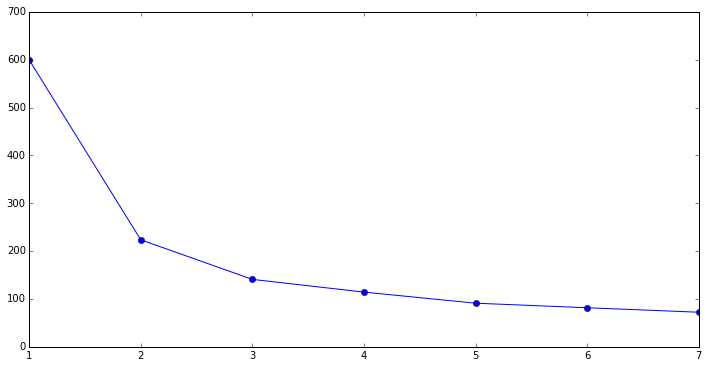

In [7]:
%pylab inline
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [9]:
for i in range(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    labels=kmeans.predict(X)
    print(i,metrics.silhouette_score(X,labels, metric='euclidean'))

(2, 0.68081362027879411)
(3, 0.55259194453090321)
(4, 0.49722797264112423)
(5, 0.4885175508654504)
(6, 0.36820569663413977)
(7, 0.35606622406690924)
(8, 0.36311999462117778)
(9, 0.33466180874400864)
(10, 0.30928768779402988)


In [8]:
def objective_function1(alpha,ss,fmi,vm):
    return alpha*ss+((1-alpha)/2)*fmi+((1-alpha)/2)*vm

In [27]:
data=pd.DataFrame(data=X,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


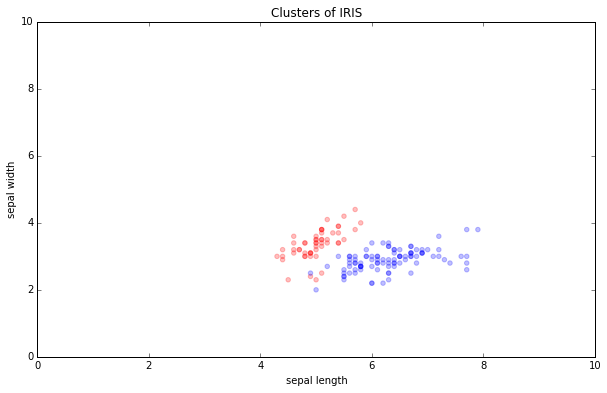

In [26]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 2 clusters of user
kmeans = KMeans(n_clusters=2,random_state=2)

kmeans.fit(data)

kmeans_colors = ['red' if c == 0 else 'blue' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x=data['sepal length (cm)'],y=data['sepal width (cm)'],alpha=0.25,color = kmeans_colors)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title("Clusters of IRIS")
plt.xlim(0.0, 10.0)
plt.ylim(0.0, 10.0)
plt.show()

### Selecting Number of Clusters

#### Elbow Criteria

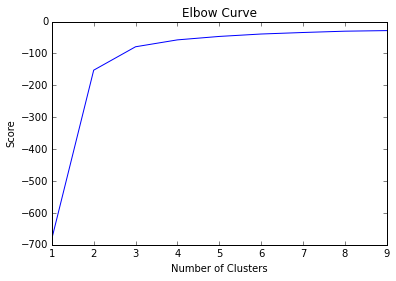

In [49]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### Selecting Number of Clusters (Using Scipy)

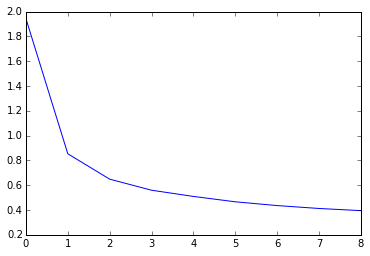

In [36]:
from scipy import cluster
#plot variance for each value for 'k' between 1,10
initial = [cluster.vq.kmeans(X,i) for i in range(1,10)]
plt.plot([var for (cent,var) in initial])
plt.show()

### Generating Clusters

In [51]:
nc=3
kmeans = KMeans(n_clusters=nc)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
kmeans.cluster_centers_

array([[ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

In [53]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
centroids,labels

(array([[ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
        [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
        [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
        2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
        1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1]))

In [54]:
#compute_DB_index(X, labels, centroids, nc)

In [55]:
X[:2][:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2]])

In [56]:
pred_labels = kmeans.labels_
ss=metrics.silhouette_score(X, pred_labels , metric='euclidean')
fmi=metrics.fowlkes_mallows_score(y, pred_labels)
vm=metrics.v_measure_score(y, pred_labels) 
print(ss,fmi,vm)
for i in range(0,11):
    print (i/10.0), objective_function1(i/10.0,ss,fmi,vm)

(0.55259194453090321, 0.82080807291141533, 0.7581756800057784)
0.0 0.789491876459
0.1 0.765801883266
0.2 0.742111890073
0.3 0.71842189688
0.4 0.694731903688
0.5 0.671041910495
0.6 0.647351917302
0.7 0.623661924109
0.8 0.599971930916
0.9 0.576281937724
1.0 0.552591944531


In [ ]:
(0.55259194453090321, 0.82080807291141533, 0.7581756800057784)
0.0 0.789491876459
0.1 0.765801883266
0.2 0.742111890073
0.3 0.71842189688
0.4 0.694731903688
0.5 0.671041910495
0.6 0.647351917302
0.7 0.623661924109
0.8 0.599971930916
0.9 0.576281937724
1.0 0.552591944531

In [57]:
def objective_function(alpha,dbi,ri,ji):
    return alpha*dbi+((1-alpha)/2)*ri+((1-alpha)/2)*ji

In [58]:
dbi=compute_DB_index(X, pred_labels, centroids, nc)
ri=metrics.adjusted_rand_score(y, pred_labels)
ji=metrics.jaccard_similarity_score(y, pred_labels)
print(dbi,ri,ji)
for i in range(0,11):
    print (i/10.0), objective_function1(i/10.0,dbi,ri,ji)

(6.657169446101694, 0.73023827228346971, 0.89333333333333331)
0.0 0.811785802808
0.1 1.39632416714
0.2 1.98086253147
0.3 2.5654008958
0.4 3.14993926013
0.5 3.73447762446
0.6 4.31901598878
0.7 4.90355435311
0.8 5.48809271744
0.9 6.07263108177
1.0 6.6571694461


### Evaluating Performance 

### Internal Evaluation

#### Silhouette Score

In [10]:
pred_labels = kmeans.labels_
metrics.silhouette_score(X, pred_labels , metric='euclidean')

0.55259194453090321

#### Calinski Harabaz Score

In [11]:
metrics.calinski_harabaz_score(X, pred_labels ) 

560.39992424664024

### External Evaluation

#### Jaccard Similarity Score

In [12]:
metrics.jaccard_similarity_score(y, pred_labels)

0.23999999999999999

#### Adjusted Rand Score

In [13]:
metrics.adjusted_rand_score(y, pred_labels)

0.73023827228346971

#### Adjusted Mutual Information Score

In [14]:
metrics.adjusted_mutual_info_score(y, pred_labels) 

0.74837239332294847

#### Homogeneity and Completeness

In [38]:
metrics.homogeneity_score(y, pred_labels), metrics.completeness_score(y, pred_labels) 

(0.75148540219883386, 0.76498615144898163)

#### V-measure

In [17]:
metrics.v_measure_score(y, pred_labels) 

0.75817568000577862

#### F1-Measure

In [18]:
metrics.f1_score(y, pred_labels, average='macro')

0.27272727272727271

In [19]:
metrics.f1_score(y, pred_labels, average='micro')

0.23999999999999999

In [20]:
metrics.f1_score(y, pred_labels, average='weighted')

0.27272727272727271

### Fowlkes Mallows Score

In [39]:
metrics.fowlkes_mallows_score(y, pred_labels)

0.82080807291141533

### Centroids ans Labels

In [40]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
centroids,labels

(array([[ 6.65454545,  3.04545455,  4.66363636,  1.47272727],
        [ 5.31904762,  3.74285714,  1.4952381 ,  0.26666667],
        [ 6.05384615,  2.83846154,  4.43846154,  1.39230769],
        [ 7.8       ,  3.8       ,  6.55      ,  2.1       ],
        [ 5.58      ,  2.65      ,  4.03      ,  1.235     ],
        [ 6.02777778,  2.73333333,  5.02777778,  1.79444444],
        [ 5.        ,  2.3       ,  3.275     ,  1.025     ],
        [ 7.41      ,  2.99      ,  6.25      ,  2.04      ],
        [ 6.56818182,  3.08636364,  5.53636364,  2.16363636],
        [ 4.4       ,  2.88      ,  1.28      ,  0.2       ],
        [ 4.85833333,  3.24583333,  1.475     ,  0.23333333]]),
 array([ 1, 10, 10, 10,  1,  1, 10, 10,  9, 10,  1, 10, 10,  9,  1,  1,  1,
         1,  1,  1,  1,  1, 10, 10, 10, 10, 10,  1,  1, 10, 10,  1,  1,  1,
        10, 10,  1, 10,  9, 10, 10,  9,  9, 10,  1, 10,  1, 10,  1, 10,  0,
         0,  0,  4,  0,  2,  0,  6,  0,  4,  6,  2,  4,  2,  4,  0,  2,  4,
         2, 

### Objective Function

In [30]:
def objective_function(alpha,dbi,ri,ji):
    return alpha*dbi+(1-alpha)*ri+(1-alpha)*ji

In [6]:
def objective_function1(alpha,ss,fmi,vm):
    return alpha*ss+((1-alpha)/2)*fmi+((1-alpha)/2)*vm

C:\Users\Avinash\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


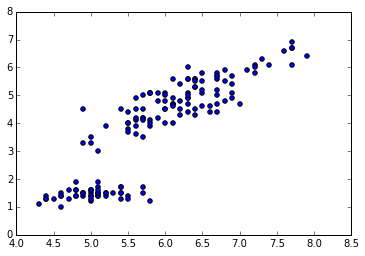

In [41]:
plt.scatter(X[:,0],X[:,2])
plt.show()

In [7]:
import pandas as pd 
from sklearn.cluster import k_means
from scipy.spatial import distance

# nc is number of clusters
# to be implemented without the use of any libraries (from the scratch)

def compute_s(i, x, labels, clusters):
	norm_c= len(clusters)
	s = 0
	for x in clusters:
		# print x
		s += distance.euclidean(x, clusters[i])
	return s

def compute_Rij(i, j, x, labels, clusters, nc):
	Rij = 0
	try:
		# print "h"
		d = distance.euclidean(clusters[i],clusters[j])
		# print d
		Rij = (compute_s(i, x, labels, clusters) + compute_s(j, x, labels, clusters))/d
		# print Rij
	except:
		Rij = 0	
	return Rij

def compute_R(i, x, labels, clusters, nc): 
	list_r = []
	for i in range(nc):
		for j in range(nc):
			if(i!=j):
				temp = compute_Rij(i, j, x, labels, clusters, nc)
				list_r.append(temp)

	return max(list_r)

def compute_DB_index(x, labels, clusters, nc):
	# print x
	sigma_R = 0.0
	for i in range(nc):
		sigma_R = sigma_R + compute_R(i, x, labels, clusters, nc)

	DB_index = float(sigma_R)/float(nc)
	return DB_index

In [62]:
df = pd.read_csv("E://dataset//cluster_dbi.csv")
df = df.dropna()
# print df
x1 = df.copy()
del x1['Customer']
del x1['Effective To Date']
x4 = pd.get_dummies(x1)
# print x4
n = 10
clf = k_means(x4, n_clusters = n)
centroids = clf[0] 
# 10 clusters
labels = clf[1] 
# print x4[1]
index_db_val = compute_DB_index(x4, labels, centroids, n)
print "The value of Davies Bouldin index for a K-Means cluser of size " + str(n) + " is: " + str(index_db_val)

The value of Davies Bouldin index for a K-Means cluser of size 10 is: 56.835717783


In [8]:
centroids

NameError: name 'centroids' is not defined

### Experiment

In [13]:
# scaling datasets
X_normal = preprocessing.scale(X)

cluster_range = range( 1, 8 )
cluster_errors = []
dbi_list=[]
ji_list=[]
ri_list=[]
alpha=0.5
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(X_normal)
    pred_labels=clusters.labels_
    ji=metrics.jaccard_similarity_score(y, pred_labels)
    ri=metrics.adjusted_rand_score(y, pred_labels)
    #dbi= compute_DB_index(X_normal, clusters.labels_, clusters.cluster_centers_, num_clusters)
    #value=objective_function(alpha,dbi,ri,ji)
    #cluster_errors.append( value )
    ji_list.append( ji )
    ri_list.append( ri )
    #dbi_list.append( dbi )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "JI": ji_list, "RI": ri_list} ) 
clusters_df 
#"DBI": dbi_list ,,'obj_func':value, "Cost": cluster_errors, 

,JI,RI,num_clusters
0,0.333333,0.000000,1
1,0.000000,0.568116,2
2,0.113333,0.592333,3
3,0.093333,0.460246,4
4,0.380000,0.432693,5
5,0.133333,0.355848,6
6,0.266667,0.379127,7


In [ ]:
1. READ VLGAAC Paper
2. Read about cluster evalution measures
3. how objective funtion is optimizing results in VLGAAC
4. HOw PSO will use Obejcetive funtion in its Cluster generation algorithm
5. More Appropriate datasets.